<a href="https://colab.research.google.com/github/Rashi0903/Lung-Cancer-Detection/blob/main/LungCancer(EfficientNet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 2102 images belonging to 2 classes.


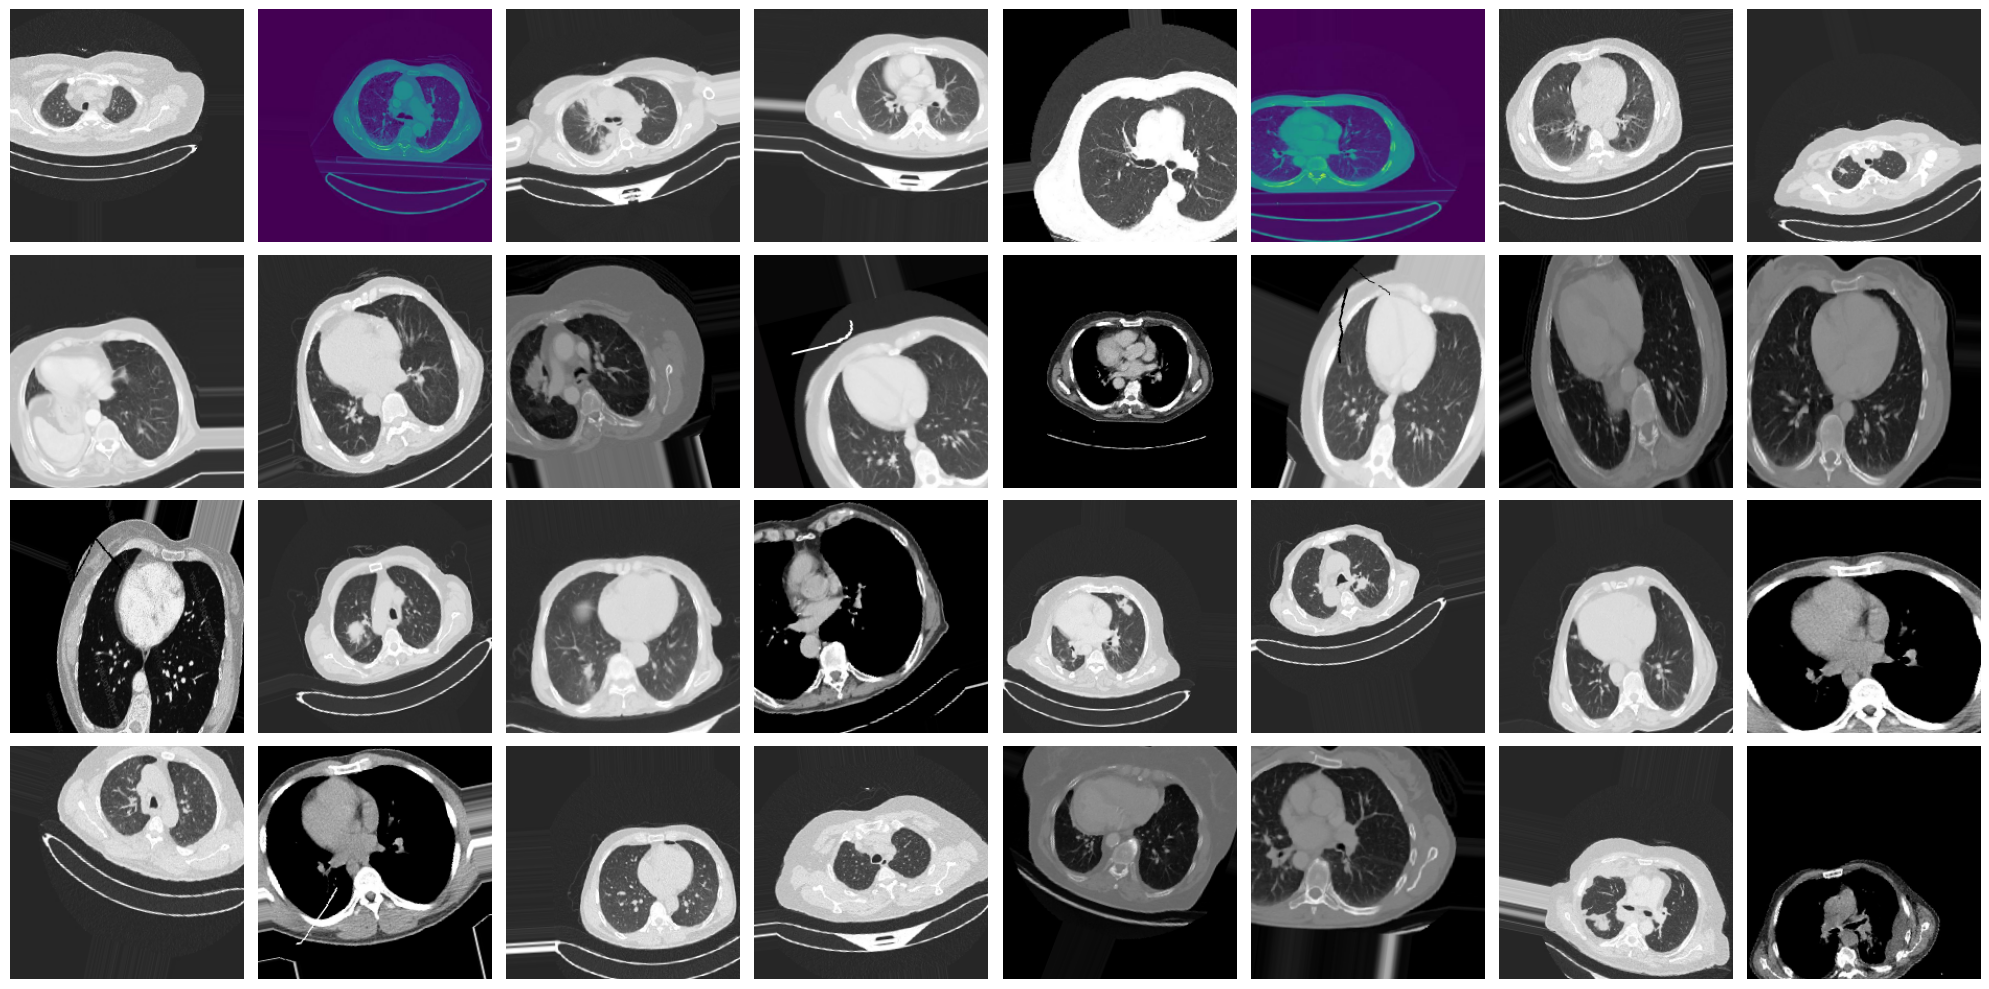

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Set the paths for training and testing data
train_dir = '/content/drive/MyDrive/cancer/train'

# Image data generator for training with augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the images from the training directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # Use 'categorical' for multi-class classification
)

# Get a batch of images and their labels
images, labels = next(train_generator)

# Display the augmented images
fig, axes = plt.subplots(4, 8, figsize=(20, 10))
axes = axes.flatten()
for img, ax in zip(images, axes):
    ax.imshow(img.astype('uint8'))
    ax.axis('off')
plt.tight_layout()
plt.show()


Found 2102 images belonging to 2 classes.
Found 2102 images belonging to 2 classes.


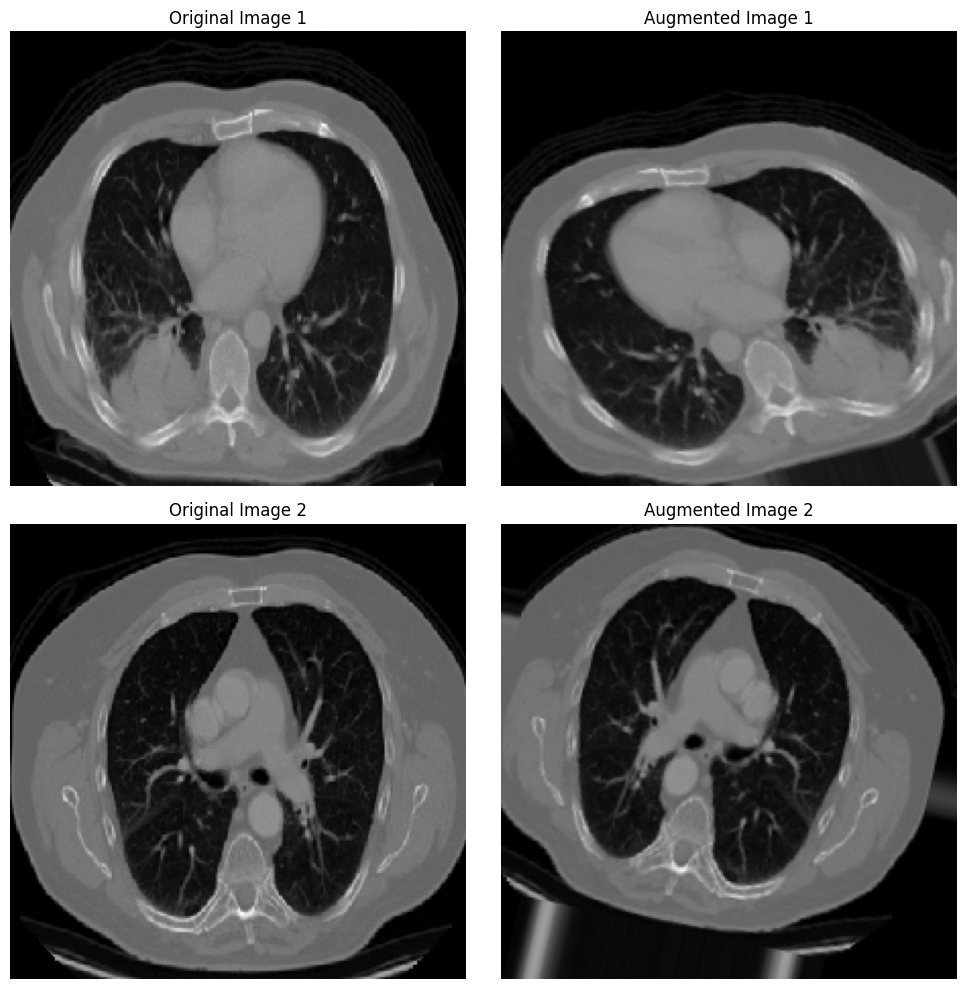

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Set the paths for training data
train_dir = '/content/drive/MyDrive/cancer/train'

# Image data generator for training with augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Image data generator without augmentation (for original images)
original_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

# Load and preprocess the images from the training directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode='binary',  # Use 'categorical' for multi-class classification
    shuffle=False
)

original_generator = original_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

# Get a batch of images and their labels (two images)
augmented_images, _ = next(train_generator)
original_images, _ = next(original_generator)

# Display the original and augmented images side by side
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

# Original image 1
axes[0].imshow(original_images[0].astype('uint8'))
axes[0].set_title('Original Image 1')
axes[0].axis('off')

# Augmented image 1
axes[1].imshow(augmented_images[0].astype('uint8'))
axes[1].set_title('Augmented Image 1')
axes[1].axis('off')

# Original image 2
original_images, _ = next(original_generator)  # Load next original image
augmented_images, _ = next(train_generator)  # Load next augmented image
axes[2].imshow(original_images[0].astype('uint8'))
axes[2].set_title('Original Image 2')
axes[2].axis('off')

# Augmented image 2
axes[3].imshow(augmented_images[0].astype('uint8'))
axes[3].set_title('Augmented Image 2')
axes[3].axis('off')

plt.tight_layout()
plt.show()


Found 2102 images belonging to 2 classes.
Found 539 images belonging to 2 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 845s 12s/step - accuracy: 0.7392 - loss: 0.4618 - val_accuracy: 0.9434 - val_loss: 0.1933
Epoch 2/10
 1/65 ━━━━━━━━━━━━━━━━━━━━ 3:54 4s/step - accuracy: 0.9062 - loss: 0.2379

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


65/65 ━━━━━━━━━━━━━━━━━━━━ 42s 598ms/step - accuracy: 0.9062 - loss: 0.2379 - val_accuracy: 1.0000 - val_loss: 0.2053
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 305s 4s/step - accuracy: 0.8993 - loss: 0.2395 - val_accuracy: 0.9434 - val_loss: 0.1769
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9062 - loss: 0.1888 - val_accuracy: 1.0000 - val_loss: 0.1107
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 247s 4s/step - accuracy: 0.9093 - loss: 0.2110 - val_accuracy: 0.9570 - val_loss: 0.1543
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9688 - loss: 0.1389 - val_accuracy: 1.0000 - val_loss: 0.0855
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 259s 4s/step - accuracy: 0.9187 - loss: 0.1939 - val_accuracy: 0.9629 - val_loss: 0.1194
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.8750 - loss: 0.2290 - val_accuracy: 1.0000 - val_loss: 0.1237
Epoch 9/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 248s 4s/step - accuracy: 0.9097 - loss: 0.2000 - val_accuracy: 0.9648 - val_loss: 

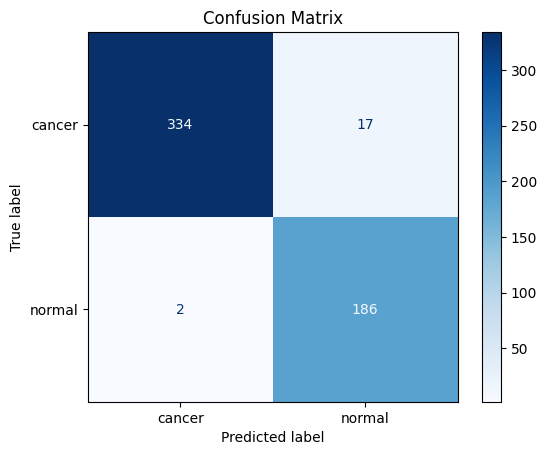

In [ ]:
#efficientnet

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, precision_score

# Set the paths for training and testing data
train_dir = '/content/drive/MyDrive/cancer/train'
test_dir = '/content/drive/My Drive/cancer/test'

# Image data generator for training and testing
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

# Load and preprocess the images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # Use 'categorical' for multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important for getting the correct labels during evaluation
)

# Load the EfficientNetB0 model, excluding the top layers
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Use 'softmax' for multi-class classification

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=10  # Adjust the number of epochs as needed
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')  # Print the final accuracy in percentage

# Generate predictions and true labels
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Compute precision, recall, and F1-score
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Found 2102 images belonging to 2 classes.
Found 539 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.7338 - loss: 0.5267 - val_accuracy: 0.8906 - val_loss: 0.2279
Epoch 2/10
 1/65 ━━━━━━━━━━━━━━━━━━━━ 2:06 2s/step - accuracy: 0.7188 - loss: 0.4605

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7188 - loss: 0.4605 - val_accuracy: 0.7778 - val_loss: 0.5276
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.8881 - loss: 0.2468 - val_accuracy: 0.9355 - val_loss: 0.1714
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 17s 241ms/step - accuracy: 0.9062 - loss: 0.2426 - val_accuracy: 0.8889 - val_loss: 0.3009
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.9218 - loss: 0.2001 - val_accuracy: 0.9316 - val_loss: 0.1735
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9688 - loss: 0.1369 - val_accuracy: 0.8889 - val_loss: 0.2954
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.9307 - loss: 0.1834 - val_accuracy: 0.9531 - val_loss: 0.1557
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9375 - loss: 0.2178 - val_accuracy: 1.0000 - val_loss: 0.1136
Epoch 9/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.9301 - loss: 0.1759 - val_accuracy: 0.9414 - val_loss: 

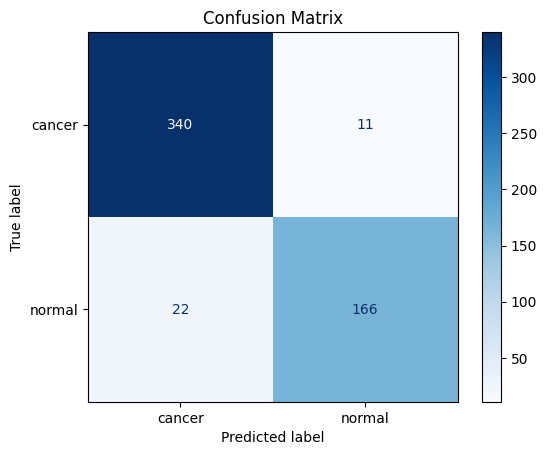

In [ ]:
#mobilenetv2

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, precision_score
import numpy as np
import matplotlib.pyplot as plt

# Set the paths for training and testing data
train_dir = '/content/drive/MyDrive/cancer/train'
test_dir = '/content/drive/My Drive/cancer/test'

# Image data generator for training and testing
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

# Load and preprocess the images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # Use 'categorical' for multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important for getting the correct labels during evaluation
)

# Load the MobileNetV2 model, excluding the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Use 'softmax' for multi-class classification

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=10  # Adjust the number of epochs as needed
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')  # Print the final accuracy in percentage

# Generate predictions and true labels
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Compute precision, recall, and F1-score
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
